# Investment Value

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [2]:
# Set current amount of shares data
shares_data = {
    "shares" : [200, 320]
}
# Set the tickers
tickers = ["MSFT", "AAPL"]

# Create the shares DataFrame
df_shares_data = pd.DataFrame(shares_data, index=tickers)
# Display shares data
df_shares_data

,shares
MSFT,200
AAPL,320


In [3]:
# Load .env environment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Key type: {type(alpaca_api_key)}")
print(f"Secret type: {type(alpaca_api_key)}")

Key type: <class 'str'>
Secret type: <class 'str'>


In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [7]:
# Format current date as ISO format
#today = pd.Timestamp.now()
today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()
print(today)

2021-03-12T00:00:00-05:00


In [8]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [9]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_barset(tickers, timeframe, start=today, end=today).df

# Display sample data
df_portfolio.head()

AAPL                                      MSFT  \
                            open    high     low   close    volume    open   
time                                                                         
2021-03-12 00:00:00-05:00  120.4  121.17  119.16  121.05  82228604  234.01   

                                                            
                             high     low  close    volume  
time                                                        
2021-03-12 00:00:00-05:00  235.82  233.23  235.8  19053720

## Calculate the current value in dollars of the stock portfolio

In [10]:
# Fetch the current closing prices from the DataFrame
msft_price = float(df_portfolio['MSFT']['close'])
aapl_price = float(df_portfolio['AAPL']['close'])


In [11]:
# Compute the current value in dollars of the stock portfolio
msft_value = msft_price * df_shares_data.loc['MSFT']['shares']
aapl_value = aapl_price * df_shares_data.loc['AAPL']['shares']

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares_data.loc['MSFT']['shares']} MSFT shares is ${msft_value:0.2f}")
print(f"The current value of the {df_shares_data.loc['AAPL']['shares']} AAPL shares is ${aapl_value:0.2f}")
     

The current value of the 200 MSFT shares is $47160.00
The current value of the 320 AAPL shares is $38736.00


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [12]:
# Set the data for the shares value DataFrame
value_data = {
    "MSFT" : [msft_value],
    "AAPL" : [aapl_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,MSFT,AAPL
0,47160.0,38736.0


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='shares'>

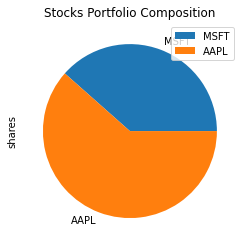

In [13]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares_data.plot.pie(y="shares", title="Stocks Portfolio Composition")

<AxesSubplot:title={'center':'Current value in Dollars of Stock Portfolio'}>

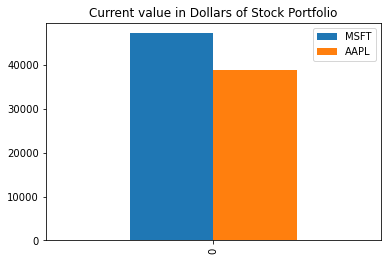

In [14]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current value in Dollars of Stock Portfolio")